In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('CarBuyers_Final.csv')
df.head()

,Manufacturer,Model,Price,Transmission,Power,Engine CC,Fuel,Male,Female,Unknown,Total
0,Ford,Focus,30.619322,5.966102,94.033898,1497.169492,petrol,814172,422731,56487,1293390
1,Ford,Fiesta,18.532143,5.714286,68.571429,1166.142857,petrol,554879,631666,54057,1240602
2,Volkswagen,Golf,31.242154,6.164835,89.461538,1537.406593,petrol,483216,310604,47563,841383
3,Renault,Clio,22.100000,5.615385,75.576923,1219.653846,petrol,241287,312556,28004,581847
4,BMW,320i,47.848370,6.444444,126.111111,1995.777778,petrol,408016,115843,29125,552984


# Description of datasets

This data describes the different types of car models as well as the manufacturer, transmission, engine power, and other important details about the car. It also includes relevant information such as its price, the number of male and female buyers, and how many cars were sold.

In [3]:
df.columns

Index(['Manufacturer', 'Model', 'Price', 'Transmission', 'Power', 'Engine CC',
       'Fuel', 'Male', 'Female', 'Unknown', 'Total'],
      dtype='object')

In [4]:
df.drop(['Transmission', 'Power', 'Engine CC','Fuel','Unknown'],
        axis = 1,
        inplace = True)
df.columns

Index(['Manufacturer', 'Model', 'Price', 'Male', 'Female', 'Total'], dtype='object')

In [5]:
df.rename(columns = {'Male':'Male Buyer', 'Female': 'Female Buyer', 'Total' : 'Total Buyers'},
          inplace = True
         )

# Description of the variables

**Manufacturer** - This is a variable, column, that mentions the company that manufactures the car. This variable is a str.

**Model** - This is a variable, column, that shows the name of the car. This variable is type str.

**Price** - This is a variable, column, that shows the price of the car. This variable is type float.

**Male Buyer** - This is a variable, column, that shows who many men have bought the car. This variable is type int.

**Female Buyer** - This is a variable, column, that shows who many women have bought the car. This variable is type int.

**Total Buyers** - This is a variable, column, that shows who many people in total have bought the car. This variable is type int.

# 1. What Manufacturer makes the most expensive cars

In [6]:
y = df

In [7]:
y.drop(['Model','Male Buyer', 'Female Buyer', 'Total Buyers'],
        axis = 1,
        inplace = True)
y.columns

Index(['Manufacturer', 'Price'], dtype='object')

In [8]:
c = y.groupby(['Manufacturer']).mean().nlargest(5,'Price')
c.head()

,Price
Manufacturer,
Bentley,285.247000
Maserati,245.168000
Aston-Martin,244.301839
Ferrari,230.242625
Porsche,204.193062


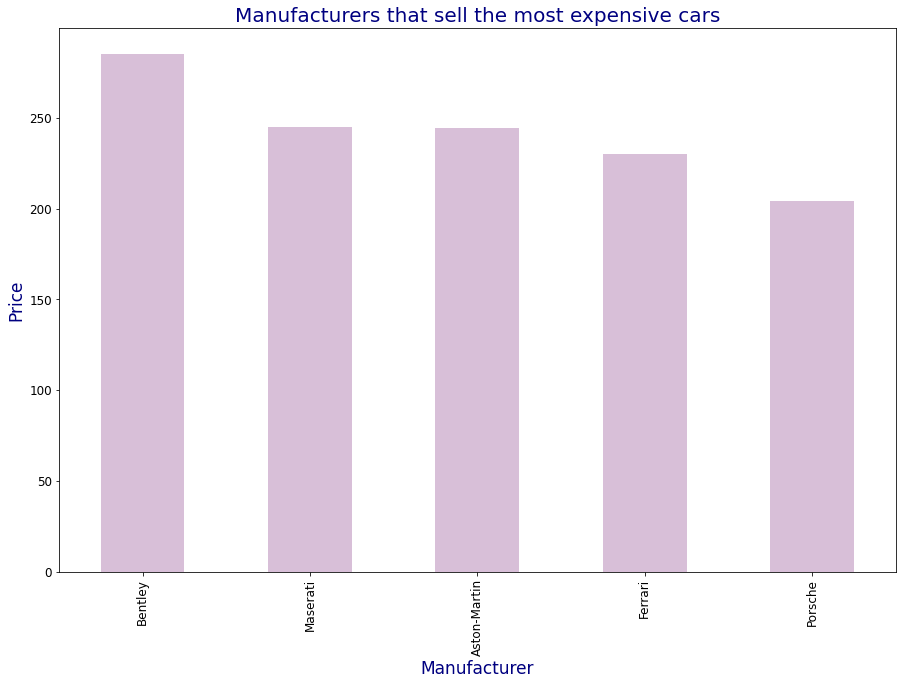

In [9]:
c.plot(figsize=(15, 10),legend = False, kind= 'bar', color = 'thistle')
plt.xticks(fontsize = 10, rotation = 90)
plt.title('Manufacturers that sell the most expensive cars', fontsize = 20, color = 'navy')
plt.xlabel('Manufacturer', fontweight = 'regular',color= 'navy' , fontsize =17,
           horizontalalignment= 'center')
plt.ylabel('Price', fontweight = 'regular',color= 'navy' , fontsize =17,
           horizontalalignment= 'center')

plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)

plt.show()

# Conclusion

From what is shown in the graph we can say that the manufacturer that makes the most expensive cars is Bentley with an average price of 285.247 k per car. In second place Maserati with an average price of 245.168 k per car, and in third place Aston-Martin with an average price of 244.301839 per car. These manufacturers have very high prices compared to the other manufacturers.

# 2. Which manufacturer sales the most cars

In [10]:
r = pd.read_csv('CarBuyers_Final.csv')

In [11]:
r.drop(['Model','Price','Transmission', 'Power', 'Engine CC','Fuel','Male', 'Female','Unknown'],
        axis = 1,
        inplace = True)
r.columns

Index(['Manufacturer', 'Total'], dtype='object')

In [12]:
r.rename(columns = {'Total': 'Total Buyers',},
          inplace = True
         )

In [13]:
r.head()

,Manufacturer,Total Buyers
0,Ford,1293390
1,Ford,1240602
2,Volkswagen,841383
3,Renault,581847
4,BMW,552984


In [14]:
p = r.groupby(['Manufacturer']).sum().nlargest(5,'Total Buyers')
p.head()

,Total Buyers
Manufacturer,
Ford,85752541
Peugeot,30749120
Volkswagen,29606038
Renault,24300697
Nissan,18578815


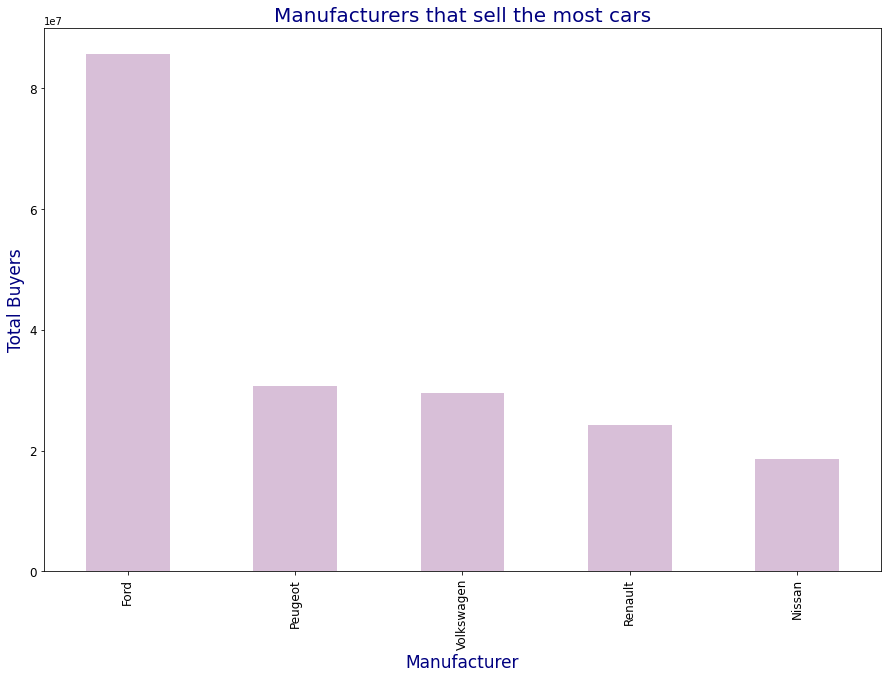

In [55]:
p.plot(figsize=(15, 10),legend = False, kind= 'bar', color = 'thistle')

plt.xticks(fontsize = 10, rotation = 90)
plt.title('Manufacturers that sell the most cars', fontsize = 20, color = 'navy')
plt.xlabel('Manufacturer', fontweight = 'regular',color= 'navy' , fontsize =17,
           horizontalalignment= 'center')
plt.ylabel('Total Buyers', fontweight = 'regular',color= 'navy' , fontsize =17,
           horizontalalignment= 'center')

plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)

plt.show()

# Conclusion

In this graph we can see that the manufacturers that sell the most cars are Ford, Peugeot, Volkswagen, Renault and Nissan. Ford selling 2 or 3 times more cars than the other manufacturers. Make it the most selling manufacturer in the world.

# 3. Which Gender buys more cars from Ford

In [16]:
z = pd.read_csv('CarBuyers_Final.csv')

In [17]:
z.rename(columns = {'Male':'Male Buyer', 'Female': 'Female Buyer', 'Unknown' : 'Unknown Buyer',
       'Total': 'Total Buyers',},
          inplace = True
         )

In [18]:
z.drop(['Model','Price','Transmission', 'Power', 'Engine CC','Fuel','Unknown Buyer','Total Buyers'],
        axis = 1,
        inplace = True)
z.columns

Index(['Manufacturer', 'Male Buyer', 'Female Buyer'], dtype='object')

In [19]:
z.head()

,Manufacturer,Male Buyer,Female Buyer
0,Ford,814172,422731
1,Ford,554879,631666
2,Volkswagen,483216,310604
3,Renault,241287,312556
4,BMW,408016,115843


In [20]:
z.set_index(['Manufacturer'], inplace = True)

In [21]:
z.head()

,Male Buyer,Female Buyer
Manufacturer,,
Ford,814172,422731
Ford,554879,631666
Volkswagen,483216,310604
Renault,241287,312556
BMW,408016,115843


In [22]:
z.columns

Index(['Male Buyer', 'Female Buyer'], dtype='object')

In [23]:
z.dtypes

Male Buyer      int64
Female Buyer    int64
dtype: object

In [24]:
w = z.groupby(['Manufacturer']).agg({'Male Buyer' : 'sum', 'Female Buyer' : 'sum'})
w.head()

,Male Buyer,Female Buyer
Manufacturer,,
Abarth,7124,4719
Alfa-Romeo,764932,233389
Aston-Martin,76029,6444
Audi,6150874,2191786
BMW,10556504,3334594


In [25]:
v = w.loc['Ford', :]
v.head(20)

Male Buyer      51471113
Female Buyer    31408449
Name: Ford, dtype: int64

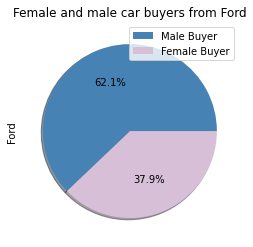

In [26]:
v.plot.pie(colors= ['steelblue', 'thistle'], legend = True, labels= None, title = 'Female and male car buyers from Ford',
          autopct='%1.1f%%',shadow=True)

# Conclusion

This research shows that men buy 24.2% more cars from Ford than women. This tells us that Ford is much more popular among men than women. 

# 4. What are de prices of the diferent type of Ford models

In [27]:
k = pd.read_csv('CarBuyers_Final.csv')

In [28]:
k.drop(['Transmission', 'Power', 'Engine CC','Fuel', 'Male', 'Female', 'Unknown',
       'Total'],
        axis = 1,
        inplace = True)
k.columns

Index(['Manufacturer', 'Model', 'Price'], dtype='object')

In [29]:
k.set_index(['Manufacturer', 'Model'], inplace = True)

In [30]:
k.head()

Price
Manufacturer Model            
Ford         Focus   30.619322
             Fiesta  18.532143
Volkswagen   Golf    31.242154
Renault      Clio    22.100000
BMW          320i    47.848370

In [31]:
x = k.loc['Ford', :].drop_duplicates()
x.head(60)

,Price
Model,
Focus,30.619322
Fiesta,18.532143
Mondeo,39.973750
Ka+,15.460000
Fusion,19.378909
Galaxy,53.785714
C-MAX,32.181500
S-MAX,47.523333
Kuga,38.752500


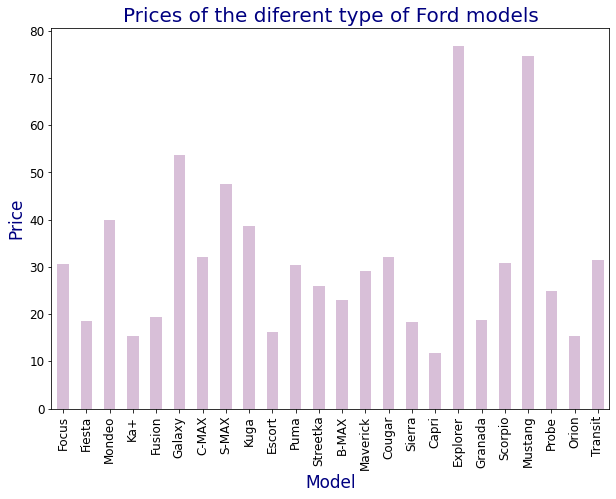

In [56]:
x.plot(figsize=(10, 7),legend = False, kind= 'bar', color = 'thistle')

plt.xticks(fontsize = 10, rotation = 90)
plt.title('Prices of the diferent type of Ford models', fontsize = 20, color = 'navy')
plt.xlabel('Model', fontweight = 'regular',color= 'navy' , fontsize =17,
           horizontalalignment= 'center')
plt.ylabel('Price', fontweight = 'regular',color= 'navy' , fontsize =17,
           horizontalalignment= 'center')

plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)

plt.show()

# Conclusion

According to the research done, the prices of the different Ford models vary considerably. They range from \\$15,000.00 dollars to $87,000.00 dollars. The most expensive being the Ford Explorer and Mustang and the cheapest being the Ford Orion and Capri.

# 5. What are the three best-selling models from Ford

In [33]:
q = pd.read_csv('CarBuyers_Final.csv')

In [34]:
q.drop(['Price','Transmission', 'Power', 'Engine CC','Fuel','Male', 'Female','Unknown'],
        axis = 1,
        inplace = True)
q.columns

Index(['Manufacturer', 'Model', 'Total'], dtype='object')

In [35]:
q.rename(columns = {'Total': 'Total Buyers',},
          inplace = True
         )

In [36]:
q.head()

,Manufacturer,Model,Total Buyers
0,Ford,Focus,1293390
1,Ford,Fiesta,1240602
2,Volkswagen,Golf,841383
3,Renault,Clio,581847
4,BMW,320i,552984


In [37]:
q.set_index(['Manufacturer', 'Model'], inplace = True)

In [38]:
o = q.loc['Ford', :]

In [39]:
b = o.groupby(['Model']).sum().nlargest(3,'Total Buyers')
b.head()

,Total Buyers
Model,
Fiesta,26473699
Escort,16781778
Focus,11464731


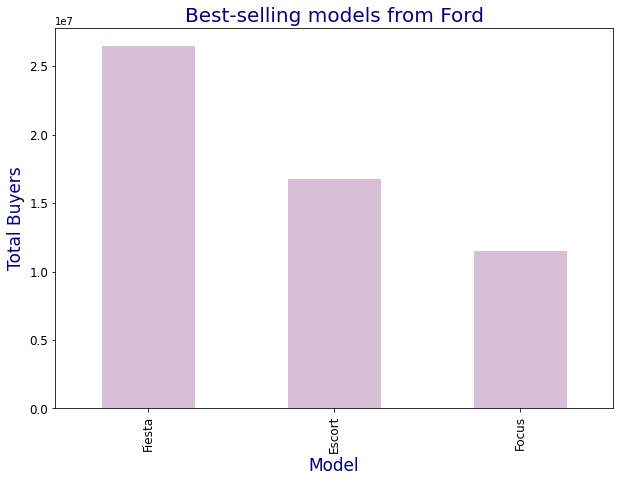

In [40]:
b.plot(figsize=(10, 7),legend = False, kind= 'bar', color = 'thistle')

plt.xticks(fontsize = 10, rotation = 90)
plt.title('Best-selling models from Ford', fontsize = 20, color = 'navy')
plt.xlabel('Model', fontweight = 'regular',color= 'navy' , fontsize =17,
           horizontalalignment= 'center')
plt.ylabel('Total Buyers', fontweight = 'regular',color= 'navy' , fontsize =17,
           horizontalalignment= 'center')

plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)

plt.show()

# Conclusion

In this graph we can see that the best-selling Ford models are the Ford Fiesta, Escort and Focus. The Ford Fiesta selling approximately 28,000,000 more cars than the Escort and Focus.

# 6. Between a Ford Fiesta, Focus and Escort which is more popular among women and which is more popular among men

In [41]:
l = pd.read_csv('CarBuyers_Final.csv')

In [42]:
l.rename(columns = {'Male':'Male Buyer', 'Female': 'Female Buyer', 'Unknown' : 'Unknown Buyer',
       'Total': 'Total Buyers',},
          inplace = True
         )

In [43]:
l.drop(['Manufacturer','Price','Transmission', 'Power', 'Engine CC','Fuel','Unknown Buyer','Total Buyers'],
        axis = 1,
        inplace = True)
l.columns

Index(['Model', 'Male Buyer', 'Female Buyer'], dtype='object')

In [44]:
j = l.groupby(['Model']).agg({'Male Buyer' : 'sum', 'Female Buyer' : 'sum'})
j.head()

,Male Buyer,Female Buyer
Model,,
09-May,374012,70387
100,290434,55293
1007,23987,24239
104,5736,4970
105,13619,7141


In [45]:
j.loc(axis=0)['Fiesta','Focus','Escort']

,Male Buyer,Female Buyer
Model,,
Fiesta,12150919,13391971
Focus,7221769,3777860
Escort,10937297,5357916


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6024bbbe90>,
      dtype=object)

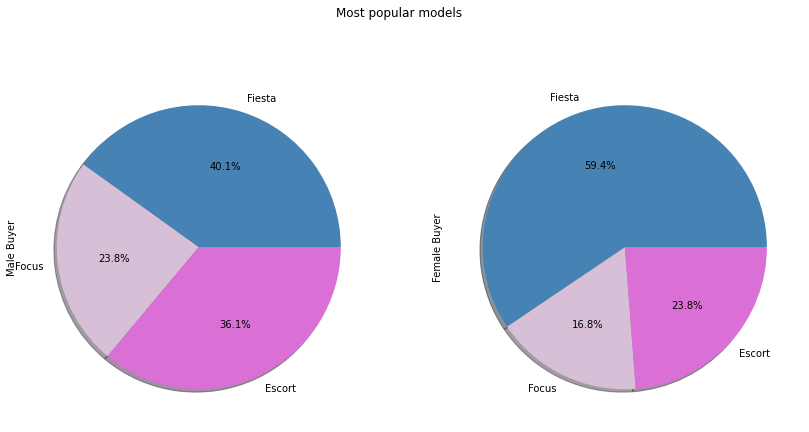

In [46]:
j.loc(axis=0)['Fiesta','Focus','Escort'].plot.pie(colors= ['steelblue', 'thistle','orchid'],figsize=(14, 7),subplots=True ,legend = False, title = 'Most popular models',
          autopct='%1.1f%%',shadow=True)

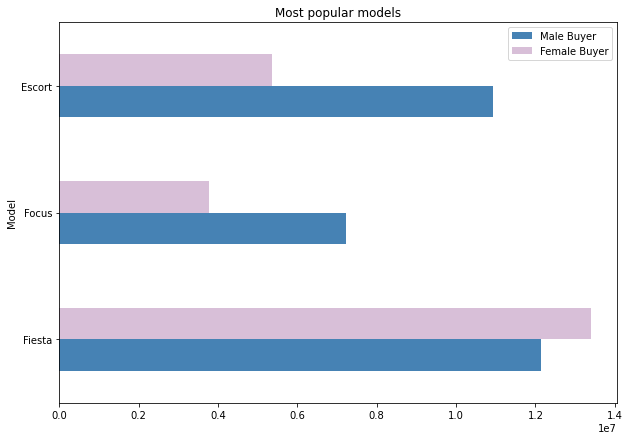

In [47]:
my_color = ['steelblue', 'thistle']
j.loc(axis=0)['Fiesta','Focus','Escort'].plot.barh(figsize=(10, 7),color = my_color, title = 'Most popular models')

# Conclusion

According to research conducted in both cases, the most popular model is the Ford Fiesta. In the case of women it is 35.6% more popular than the Ford Escort and 42.6% more popular than the Ford Focus. On the other hand, in the case of men it is 4% more popular than the Escort and 16.3% more popular than the Focus. This tells us that it is much more popular among women, plus it sales a lot more amoung woman.

# 7. Between a Ford Fiesta, Focus and Escort which one has the cheapest price

In [48]:
g = pd.read_csv('CarBuyers_Final.csv')

In [49]:
g.drop(['Manufacturer','Transmission', 'Power', 'Engine CC','Fuel', 'Male', 'Female', 'Unknown',
       'Total'],
        axis = 1,
        inplace = True)
g.columns

Index(['Model', 'Price'], dtype='object')

In [50]:
f = g.groupby(['Model']).mean()
f.head()

,Price
Model,
09-May,52.957194
100,37.326360
1007,18.657000
104,7.508333
105,4.626333


In [51]:
f.loc(axis=0)['Fiesta','Focus','Escort']

,Price
Model,
Fiesta,18.532143
Focus,30.619322
Escort,16.208744


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f601d980ad0>],
      dtype=object)

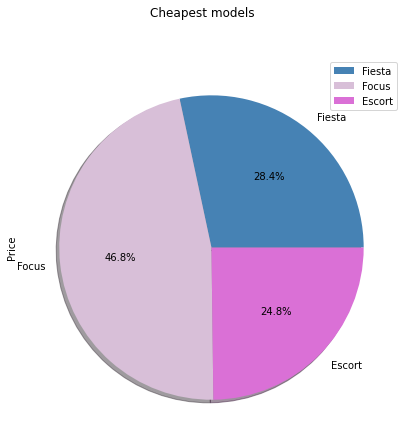

In [52]:
f.loc(axis=0)['Fiesta','Focus','Escort'].plot.pie(subplots=True, figsize=(10, 7),
                                                  colors= ['steelblue', 'thistle','orchid'],legend = True,title = 'Cheapest models',
                                                  autopct='%1.1f%%',shadow=True)

(array([ 0.,  5., 10., 15., 20., 25., 30., 35.]),
 <a list of 8 Text major ticklabel objects>)

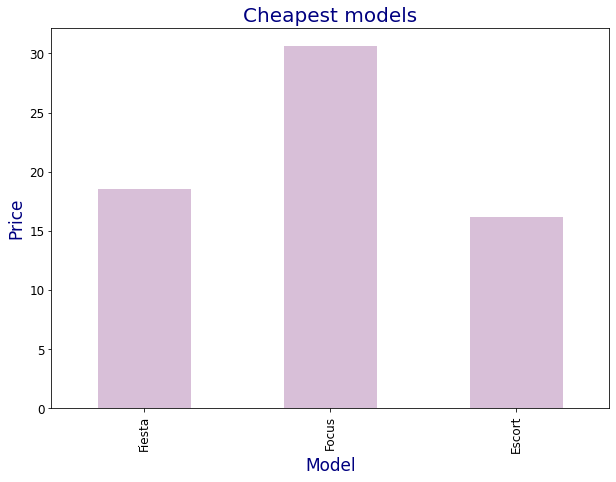

In [53]:
f.loc(axis=0)['Fiesta','Focus','Escort'].plot.bar(figsize=(10, 7),color = 'thistle', legend = False)

plt.xticks(fontsize = 10, rotation = 90)
plt.title('Cheapest models', fontsize = 20, color = 'navy')
plt.xlabel('Model', fontweight = 'regular',color= 'navy' , fontsize =17,
           horizontalalignment= 'center')
plt.ylabel('Price', fontweight = 'regular',color= 'navy' , fontsize =17,
           horizontalalignment= 'center')

plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)


Text(0.5, 1.0, 'Model Price')

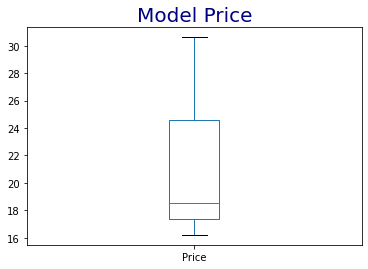

In [54]:
f.loc(axis=0)['Fiesta','Focus','Escort'].plot.box()
plt.title('Model Price', fontsize = 20, color = 'navy')

# Conclusion

According to the graph shown the cheapest car between the Ford Fiesta, Focus and Escort is the Ford Escort. But we can also observe that it doesn't have a big differences from the Ford Fiesta it's only a difference of \\$ 2,000.00 dollars approximately and a difference of $12,000.00 dollars to the Ford Focus. Which means they are in la same price range. 